In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#ali essam

Accuracy: 0.7980493454088141


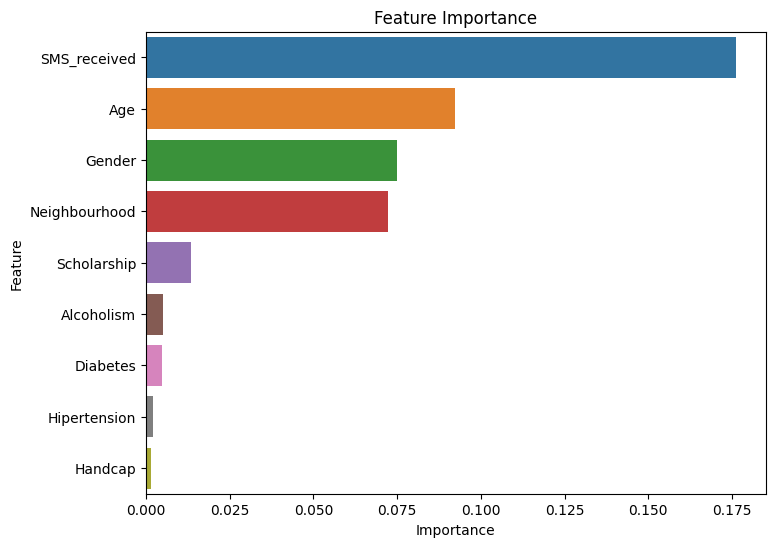

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/no_show.csv')

# Select the relevant columns for analysis
features = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
            'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

# Encode categorical variables
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Neighbourhood'] = pd.factorize(df['Neighbourhood'])[0]


# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Define the logistic regression function
def logistic_regression(X, y, num_iterations, learning_rate):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)

    for i in range(num_iterations):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)

        gradient = np.dot(X.T, (predictions - y)) / num_samples
        weights -= learning_rate * gradient

    return weights


# Prepare the data
X = df[features].values
y = np.where(df['No-show'] == 'Yes', 1, 0)

# Train the logistic regression model
num_iterations = 1000
learning_rate = 0.01
weights = logistic_regression(X, y, num_iterations, learning_rate)

# Make predictions on the test set
y_pred = np.round(sigmoid(np.dot(X, weights))).astype(int)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy}")

# Plotting feature importance
importance = np.abs(weights)
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,1,0,0,0,0,No
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0,No
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,0,0,No
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,2,0,0,0,0,0,0,No
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,1,1,0,0,0,No


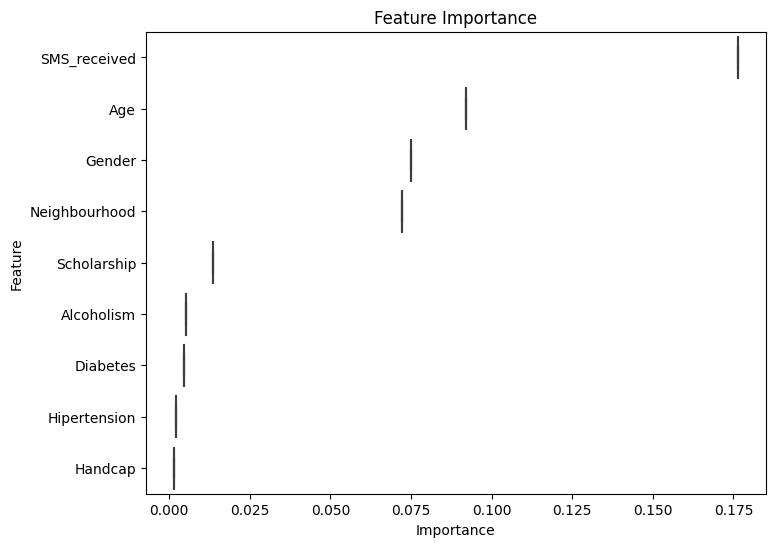

In [ ]:
# Plotting feature importance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Importance', y='Feature', data=feature_importance)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


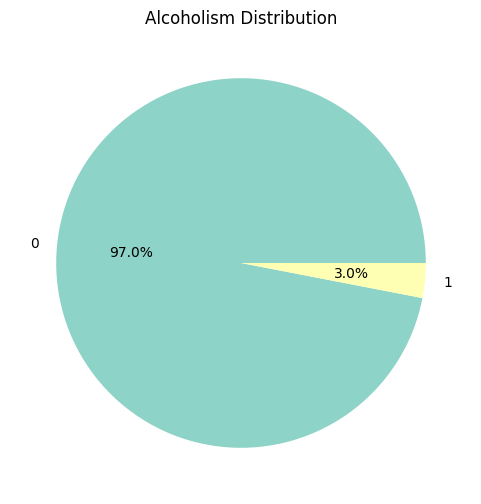

In [ ]:
# Count the number of occurrences for each category in the "Alcoholism" feature
alcoholism_counts = df['Alcoholism'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette("Set3")  # Set color palette
plt.pie(alcoholism_counts, labels=alcoholism_counts.index, autopct='%1.1f%%')
plt.title('Alcoholism Distribution')
plt.show()



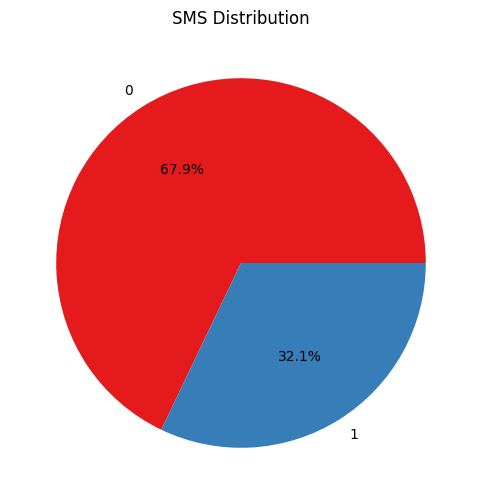

In [ ]:
# Count the number of occurrences for each category in the "SMS" feature
SMS_counts = df['SMS_received'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette("Set1")  # Set color palette
plt.pie(SMS_counts, labels=SMS_counts.index, autopct='%1.1f%%')
plt.title('SMS Distribution')
plt.show()
